# Building a Predictive Model Using Logistic Regression and KNN
## By Patrick Loader

In this notebook, I will be exploring the 2022 Fuel Consumption Ratings dataset (found here: https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings). The dataset provides emission information on different "new light-duty vehicles for retail sale in Canada in 2022". The goal of this portfolio is to build a predictive model which, using the most appropriate input features, can determine the 'CO2 Rating' of a specific model. 

**Description of fields:**
* **Model Year** - Vehicle model year
* **Make** - Vehicle make
* **Model** - Vehicle model type
* **Vehicle Class** - Car vehicle class
* **Engine Size** - Engine size in litres
* **Cylinders** - Number of cylinders
* **Transmission** - Transmission type
* **Fuel Type** - Type of fuel
* **Fuel Consumption (City(L/100km))** - City fuel consumption per 100 km
* **Fuel Consumption (Hwy(L/100km))** - Highway fuel consumption per 100 km
* **Fuel Consumption (Comb(L/100km))** - Combined (55% city, 45% highway) fuel consumption per 100 km
* **Fuel Consumption (Comb(mpg)** - Combined (55% city, 45% highway) fuel consumption as miles per gallon
* **CO2 Emissions (g/km)** - Tailpipe emissions of carbon dioxide (grams per kilometer) for combined city and highway driving
* **CO2 Rating** - Tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
* **Smog Rating** - Tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df_initial = pd.read_csv('files/MY2022_Fuel.csv')

In [7]:
df_initial.head(21)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261,4,5
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,6,3
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,3


### Preprocessing Data:

In [8]:
# determine data types for any potential encoding

df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

* Combined fuel consumption input has 2 versions, just with different measurement systems, one of those can be dropped
* Model year is the same for every vehicle, therefore, can be dropped
* 5 categorical variables have been identified, these will need to be encoded
* Outcome variable (CO2 rating) is an integer, but not continuous. 
* CO2 rating being a discrete variable means we will be using logistic regression
* All variables have the same non-null count, indicating that there is no 'missing' data

In [9]:
# dropping Fuel Consumption(Comb (mpg)) and Model Year

df_new = df_initial.drop(['Model Year', 'Fuel Consumption(Comb (mpg))' ], axis=1)

In [10]:
df_new.head(11)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,230,5,7
5,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,231,5,7
6,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,256,5,5
7,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,261,4,5
8,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,205,6,3
9,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,217,5,3


In [11]:
# convert categorical variables into numerical values

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)

df_new[["Make_num", "Model_num", "Class_num", "Transmission_num", "Fuel_num"]] = ord_enc.fit_transform(df_new[["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"]])
df_new[["Make", "Make_num", "Model", "Model_num", "Vehicle Class", "Class_num", "Transmission", "Transmission_num", "Fuel Type", "Fuel_num"]].head()

,Make,Make_num,Model,Model_num,Vehicle Class,Class_num,Transmission,Transmission_num,Fuel Type,Fuel_num
0,Acura,0,ILX,349,Compact,0,AM8,7,Z,3
1,Acura,0,MDX SH-AWD,410,SUV: Small,7,AS10,8,Z,3
2,Acura,0,RDX SH-AWD,513,SUV: Small,7,AS10,8,Z,3
3,Acura,0,RDX SH-AWD A-SPEC,514,SUV: Small,7,AS10,8,Z,3
4,Acura,0,TLX SH-AWD,615,Compact,0,AS10,8,Z,3


In [12]:
# drop old categorical variables

df = df_new.drop(['Make', 'Model', 'Vehicle Class', "Transmission", "Fuel Type" ], axis=1)
df.head()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Make_num,Model_num,Class_num,Transmission_num,Fuel_num
0,2.4,4,9.9,7.0,8.6,200,6,3,0,349,0,7,3
1,3.5,6,12.6,9.4,11.2,263,4,5,0,410,7,8,3
2,2.0,4,11.0,8.6,9.9,232,5,6,0,513,7,8,3
3,2.0,4,11.3,9.1,10.3,242,5,6,0,514,7,8,3
4,2.0,4,11.2,8.0,9.8,230,5,7,0,615,0,8,3


With the data set now cleaned and encoded, the data can now be split and trained. 

### Training and Testing:

In [61]:
# split data into training and testing sets
# split into 80:20 as it generally provides a good balance

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=142)

print(train.shape)
print(test.shape)

(756, 13)
(190, 13)


* Take note that the dataset is only small (<1000), which may lead to a more inaccurate model

In [62]:
# train logistic regrssion model, initially inputting all features as a baseline

from sklearn.linear_model import LogisticRegression


X_train = train[['Engine Size(L)','Cylinders', 'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))', 
                'CO2 Emissions(g/km)', 'Smog Rating', 'Make_num', 'Model_num', 
                'Class_num', 'Transmission_num', 'Fuel_num']]
y_train = train['CO2 Rating']

X_test = test[['Engine Size(L)','Cylinders', 'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))', 
                'CO2 Emissions(g/km)', 'Smog Rating', 'Make_num', 'Model_num', 
                'Class_num', 'Transmission_num', 'Fuel_num']]
y_test = test['CO2 Rating']

lr_model = LogisticRegression(solver = 'newton-cg', max_iter = 50000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=50000, solver='newton-cg')

In [63]:
# run prediction using first model

test_prediction1 = lr_model.predict(X_test)
print(test_prediction1)

[4 5 2 5 5 4 4 3 3 2 3 4 2 5 3 4 3 7 5 5 3 4 5 4 3 7 4 4 6 3 2 6 7 5 4 3 4
 5 5 4 5 8 5 3 7 4 5 4 4 5 4 3 5 5 5 5 7 7 6 5 5 5 5 3 5 4 4 5 3 4 4 5 8 7
 4 4 3 4 4 3 5 3 2 4 5 3 4 4 1 5 5 6 8 7 6 3 5 4 7 5 3 5 4 3 2 6 5 5 2 3 6
 2 5 5 4 5 4 7 5 4 4 3 6 9 5 5 4 4 3 9 4 5 4 7 5 4 6 3 4 7 6 5 7 5 3 3 4 3
 3 5 3 6 5 4 5 4 7 6 4 5 3 6 2 5 5 4 5 6 5 4 4 2 3 5 4 5 4 3 3 3 4 5 3 3 4
 6 4 5 5 5]


In [64]:
# evaluate model using accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

train_prediction1 = lr_model.predict(X_train)

print("Accuracy scores on testing set:", accuracy_score(y_test, test_prediction1))

Accuracy scores on testing set: 0.9631578947368421


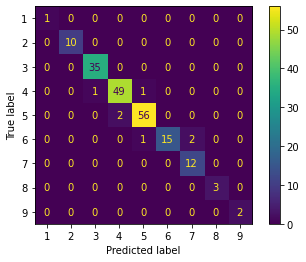

In [65]:
# visualise accuracy using confusion matrix

plot_confusion_matrix(lr_model, X_test, y_test)

 * The model must now be optimised by choosing more appropriate features

In [66]:
# find the most correlated features to optimise model

corr_Engine = df['Engine Size(L)'].corr(df['CO2 Rating']) 
corr_Cylinders = df['Cylinders'].corr(df['CO2 Rating']) 
corr_City = df['Fuel Consumption (City (L/100 km)'].corr(df['CO2 Rating']) 
corr_Hwy = df['Fuel Consumption(Hwy (L/100 km))'].corr(df['CO2 Rating']) 
corr_Emissions = df['CO2 Emissions(g/km)'].corr(df['CO2 Rating']) 
corr_Smog = df['Smog Rating'].corr(df['CO2 Rating']) 
corr_Make = df['Make_num'].corr(df['CO2 Rating']) 
corr_Model = df['Model_num'].corr(df['CO2 Rating']) 
corr_Class = df['Class_num'].corr(df['CO2 Rating']) 
corr_Transmission = df['Transmission_num'].corr(df['CO2 Rating']) 
corr_Fuel = df['Fuel_num'].corr(df['CO2 Rating']) 


print('corr_Engine: ', corr_Engine)
print('corr_Cylinders: ', corr_Cylinders)
print('corr_City: ', corr_City)
print('corr_Hwy: ', corr_Hwy)
print('corr_Emissions: ', corr_Emissions)
print('corr_Smog: ', corr_Smog)
print('corr_Make: ', corr_Make)
print('corr_Model: ', corr_Model)
print('corr_Class: ', corr_Class)
print('corr_Transmission: ', corr_Transmission)
print('corr_Fuel: ', corr_Fuel)

corr_Engine:  -0.7663334003326304
corr_Cylinders:  -0.7621566817358547
corr_City:  -0.9205237237361883
corr_Hwy:  -0.8946676902629512
corr_Emissions:  -0.9545925279655436
corr_Smog:  0.5026254351172259
corr_Make:  0.24817029365005258
corr_Model:  -0.047274822795243795
corr_Class:  -0.2001384842622284
corr_Transmission:  0.3357563465485803
corr_Fuel:  -0.17818788045008516


In [67]:
# choosing all features with greater than 50% correlation (positive or negative)

X_train = train[['Engine Size(L)','Cylinders', 'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))', 
                 'CO2 Emissions(g/km)', 'Smog Rating']]
y_train = train['CO2 Rating']

X_test = test[['Engine Size(L)','Cylinders', 'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))', 
               'CO2 Emissions(g/km)', 'Smog Rating']]
y_test = test['CO2 Rating']


lr_model = LogisticRegression(solver = 'newton-cg', max_iter=5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='newton-cg')

In [68]:
test_prediction1 = lr_model.predict(X_test)
print(test_prediction1)

[4 5 2 5 5 4 4 3 3 2 3 4 2 5 3 4 3 7 5 5 3 4 5 4 3 7 4 4 6 3 2 6 7 5 4 3 4
 5 5 4 5 8 5 3 6 4 5 4 4 5 4 3 5 5 5 5 7 7 7 5 5 5 5 4 5 4 4 6 3 4 4 5 8 6
 4 4 3 4 4 3 5 3 2 4 5 3 4 4 1 5 5 6 8 7 6 3 5 5 7 5 3 5 4 3 2 6 5 5 2 3 6
 2 5 5 4 5 4 7 5 4 4 3 6 9 5 5 4 4 3 9 4 5 4 7 5 4 6 3 4 7 6 5 7 4 3 3 4 3
 3 5 3 6 5 4 5 4 7 6 4 5 3 6 2 5 5 4 5 6 5 5 4 2 3 5 4 5 4 3 4 3 4 5 3 3 4
 6 4 5 5 5]


In [69]:
train_prediction1 = lr_model.predict(X_train)

print("Accuracy scores on testing set:", accuracy_score(y_test, test_prediction1))

Accuracy scores on testing set: 0.9894736842105263


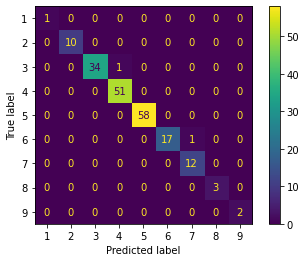

In [70]:
plot_confusion_matrix(lr_model, X_test, y_test)

* The model is now 98.9% accurate using the simple logistic regression model
* Now we will build a more advanced model and compare

### Using KNN to build another prediction model:

In [71]:
# determine ideal k value

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range (1,101)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, knn_prediction)
    scores_list.append(metrics.accuracy_score(y_test, knn_prediction))

In [72]:
print(scores_list)

[0.9894736842105263, 0.9842105263157894, 0.9894736842105263, 0.9947368421052631, 0.9894736842105263, 0.9789473684210527, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9789473684210527, 0.9736842105263158, 0.968421052631579, 0.968421052631579, 0.968421052631579, 0.9736842105263158, 0.968421052631579, 0.968421052631579, 0.9631578947368421, 0.9631578947368421, 0.9631578947368421, 0.9631578947368421, 0.9631578947368421, 0.9631578947368421, 0.9578947368421052, 0.9578947368421052, 0.9578947368421052, 0.9631578947368421, 0.9631578947368421, 0.9526315789473684, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9526315789473684, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9421052631578948, 0.9421052631578948, 0.9421052631578948, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.94

([<matplotlib.axis.XTick at 0x1e856b1a610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

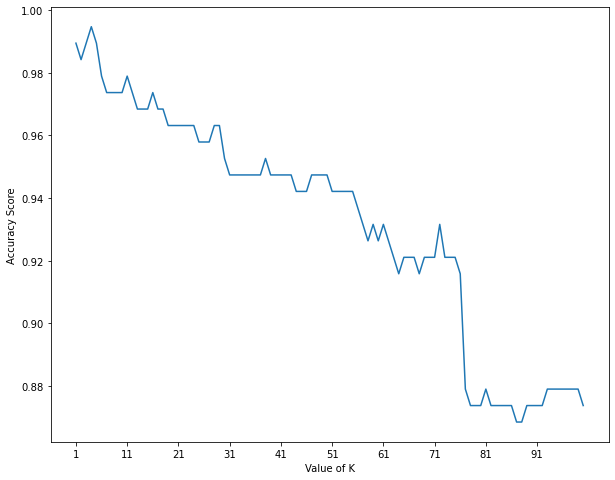

In [73]:
#visualise k-value against accuracy score

plt.figure(figsize=(10,8))
plt.plot(k_range, scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(min(k_range), max(k_range)+1, 10))

* No need increase range as a lower k-value seems to be clearly more accurate than a larger one

In [74]:
# find k-value of maximum accuracy

max_value = max(scores_list)
max_index = scores_list.index(max_value)
print(max_index)

3


In [75]:
# accuracy of model with k-value of 3

print(scores_list[3])

0.9947368421052631


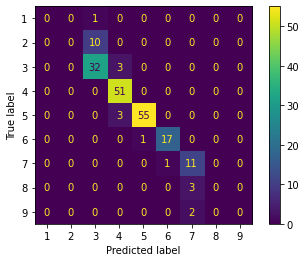

In [76]:
# visualise the accuracy of the model

plot_confusion_matrix(knn, X_test, y_test)

### Comparison and Conclusion

Both the logistic regression and K-nearest neighbour models were incredibly accurate models. This is likely due to the extremely high correlation between inputs, particularly 'Carbon Emission' and the three 'Fuel Consumption' inputs. This is to be expected as the target output, 'Carbon Rating', is intended to be a scaled and easily interpretable measurement of those inputs. 

Despite this, the KNN model is still preferrable due to it's superior accuracy - quantified as 0.99474 (5dp) compared to 0.98947 for the lr model. When being used on the testing set, the number of innacurrate predictions was as follows:
* Logistic regression - 2
* KNN - 25

This reversal of superiority in false predictions is likely a symptom of the small dataset that may have resulted in a high proportion of outlying data falling into the testing dataset, defying the predictive capability of the KNN model when it comes to working on that particularly sample of data. 